In [1]:
import lib.draw as draw
import lib.marking_evaluation as meval
import matplotlib.pyplot as plt
import numpy as np
import optuna
optuna.logging.set_verbosity(optuna.logging.ERROR)

In [2]:
def create_adversary(opposing_team):
    adversary = meval.Team()
    adversary.initialize_heuristic(w1=1, w2=1, w3=1, w4=1, mad=5)
    adversary.add_player(opposing_team[0][0], opposing_team[0][1], True)
    for player in opposing_team[1:]:
        adversary.add_player(player[0], player[1])
    return adversary

In [3]:
def do_study(adversary):
    proposed_team = meval.Team()
    def objective(trial):
        proposed_team.reset()
        for i in range(10):
            proposed_team.add_player(trial.suggest_uniform('x'+str(i), 0, 100), trial.suggest_uniform('y'+str(i), 0, 100))
        return adversary.calculate_heuristic(proposed_team)
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=1000)
    return study

In [4]:
def plot_proposed_team(adversary, study):
    proposed_team = meval.Team()
    for i in range(10):
        proposed_team.add_player(study.best_params['x'+str(i)], study.best_params['y'+str(i)])
    adversary.calculate_heuristic(proposed_team)
    adversary.plot_result(proposed_team)

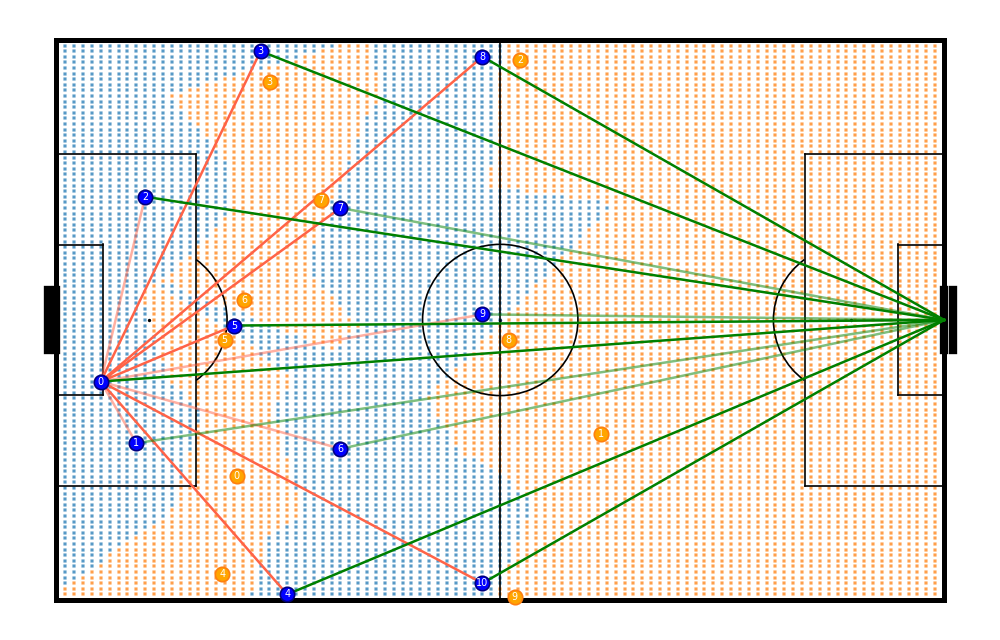

In [5]:
opposing_team = [(5, 39), (9, 28), (10, 72), (23, 98), (26, 1), (20, 49), (32, 27), (32, 70), (48, 97), (48, 51), (48, 3)]
adversary = create_adversary(opposing_team)
study = do_study(adversary)
plot_proposed_team(adversary, study)